In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

import random

In [2]:
np.random.seed(0)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

In [6]:
num_of_samples = []
 
cols = 5
num_classes = 10

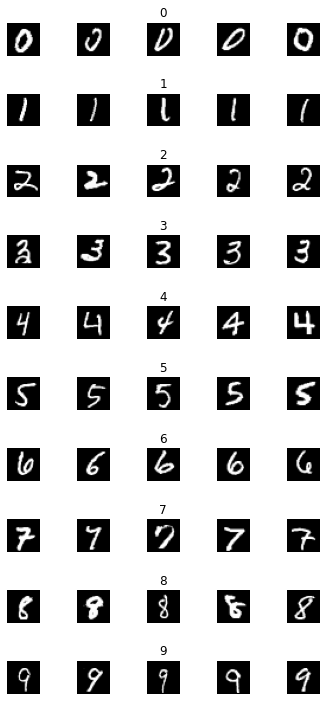

In [7]:
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")

        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


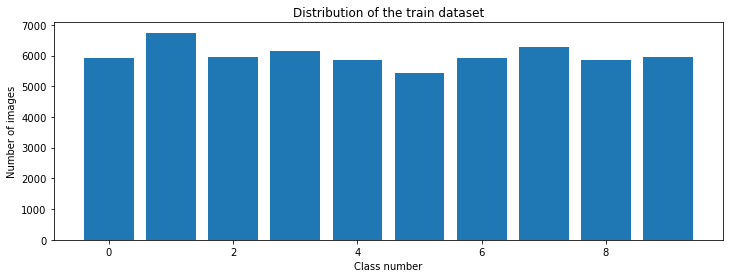

In [8]:
print(num_of_samples)

plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

Note, this time we are leaving the image as a 28x28 image, not flattening it. We are also adding a depth of 1.

In [9]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [10]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
url = 'https://printables.space/files/uploads/download-and-print/large-printable-numbers/3-a4-1200x1697.jpg'

# Create our CNN
We will design a LeNet-based model to classify the MNIST data.
![Basic LeNet CNN architecture](./LeNet-5-CNN-architecture.png)


## Define the LeNet model function

In [13]:
def leNet_model():
    
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5)) # used to precent overfitting; placed between two high-parameter layers
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(Adam(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [14]:
model = leNet_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 375)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               188000    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0

In [15]:
history=model.fit(X_train, y_train, epochs=10,  validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

Epoch 1/10
135/135 [==============================] - 6s 44ms/step - loss: 0.5506 - accuracy: 0.8168 - val_loss: 0.0619 - val_accuracy: 0.9825
Epoch 2/10
135/135 [==============================] - 5s 40ms/step - loss: 0.0757 - accuracy: 0.9771 - val_loss: 0.0519 - val_accuracy: 0.9855
Epoch 3/10
135/135 [==============================] - 5s 40ms/step - loss: 0.0719 - accuracy: 0.9790 - val_loss: 0.0418 - val_accuracy: 0.9870
Epoch 4/10
135/135 [==============================] - 5s 40ms/step - loss: 0.0558 - accuracy: 0.9830 - val_loss: 0.0355 - val_accuracy: 0.9902
Epoch 5/10
135/135 [==============================] - 5s 40ms/step - loss: 0.0479 - accuracy: 0.9849 - val_loss: 0.0476 - val_accuracy: 0.9867
Epoch 6/10
135/135 [==============================] - 6s 41ms/step - loss: 0.0449 - accuracy: 0.9853 - val_loss: 0.0422 - val_accuracy: 0.9897
Epoch 7/10
135/135 [==============================] - 6s 42ms/step - loss: 0.0467 - accuracy: 0.9851 - val_loss: 0.0339 - val_accuracy: 0.9902

Text(0.5, 0, 'epoch')

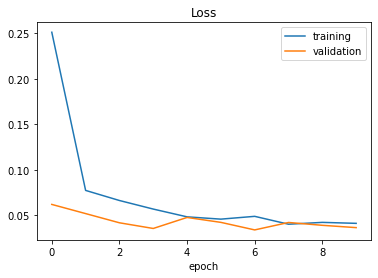

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

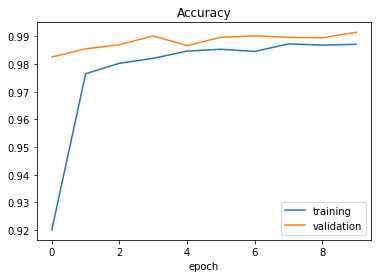

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [18]:
score = model.evaluate(X_test, y_test, verbose=0)
 
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.04006263241171837
Test accuracy: 0.9896000027656555


## Predict a number from a different dataset

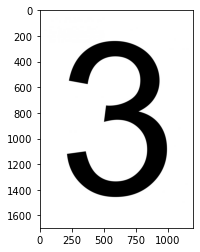

In [19]:
import requests
from PIL import Image

test_digit = 3
url = f'https://printables.space/files/uploads/download-and-print/large-printable-numbers/{test_digit}-a4-1200x1697.jpg'
 
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

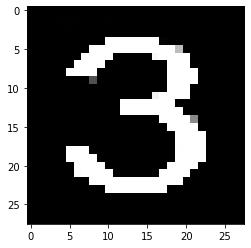

In [20]:
import cv2
 
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [21]:
img = img/255
img = img.reshape(1,28,28,1)
print(img.shape)
 
print(img.shape)

(1, 28, 28, 1)
(1, 28, 28, 1)


In [22]:
print("predicted digit: "+str(model.predict_classes(img)))

predicted digit: [3]


/Users/kenpower/opt/anaconda3/envs/DeepLearning/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [23]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

visual_layer1 = layer1.predict(img)
visual_layer2 = layer2.predict(img)

In [24]:
print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


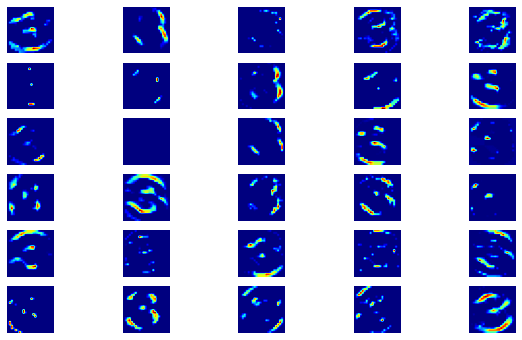

In [25]:
#layer 1
plt.figure(figsize=(10, 6))

for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')

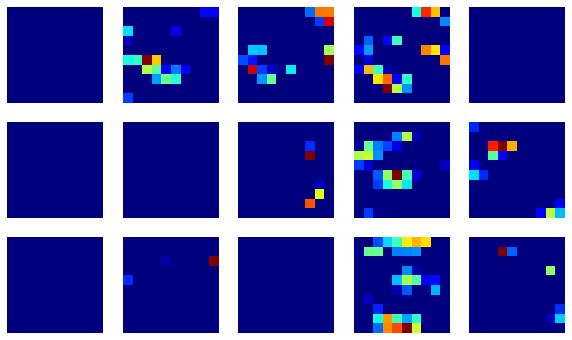

In [26]:
#layer 2
plt.figure(figsize=(10, 6))

for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')